In [2]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read data

df = pd.read_csv('netflix1.csv', index_col = 0, header = 0)

In [4]:
# Basic Info

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, s1 to s8786
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8790 non-null   object
 1   title         8790 non-null   object
 2   director      8790 non-null   object
 3   country       8790 non-null   object
 4   date_added    8790 non-null   object
 5   release_year  8790 non-null   int64 
 6   rating        8790 non-null   object
 7   duration      8790 non-null   object
 8   listed_in     8790 non-null   object
dtypes: int64(1), object(8)
memory usage: 686.7+ KB


No null values to handle

In [5]:
regex = re.compile(r"\d+")

# df['duration_int'] = [regex.search(str(x)) for x in df['duration']]
df['duration_int'] = [re.findall(r'\d+',str(x))[0] for x in df['duration']]
df['duration_unit'] = [re.sub(r'\d+','', str(x)) for x in df['duration']]

# df['duration_int'] = df['duration_int'].replace('[','')

df

,type,title,director,country,date_added,release_year,rating,duration,listed_in,duration_int,duration_unit
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries,90,min
s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1,Season
s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",1,Season
s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies",91,min
s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",125,min
...,...,...,...,...,...,...,...,...,...,...,...
s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",2,Seasons
s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV,3,Seasons
s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",1,Season


In [57]:

tv_show = df.iloc[:,[2,9,10]][(df['type'] == 'TV Show') & (df['director'] != 'Not Given')]
tv_show['duration_int'] = tv_show['duration_int'].astype(int)
tv_show['duration_unit'] = tv_show['duration_unit'].astype(str)

# tv_show.groupby(['director'])['duration_int','duration_int'].agg('mean','max')

tv_summary = tv_show.groupby("director").agg(
    Avg_Duration = ("duration_int", "mean"),
    Max_Duration = ("duration_int","max")
)

# tv_summary.sort_values('Avg_Duration',ascending=False)
tv_summary = pd.DataFrame(tv_summary).reindex()

tv_summary['director'] = tv_summary.index
tv_summary.reset_index(drop=True, inplace=True)
# tv_summary['Avg_Duration'] = ["{:.2f}".format(x) for x in tv_summary['Avg_Duration']]
tv_summary['Avg_Duration'] = tv_summary['Avg_Duration'].round()
tv_summary



,Avg_Duration,Max_Duration,director
0,2.0,2,"Adrien Lagier, Ousmane Ly"
1,1.0,1,Adrián García Bogliano
2,1.0,1,Ah Loong
3,1.0,1,Ahmet Katıksız
4,1.0,1,Alain Brunard
...,...,...,...
220,1.0,1,Vijay S. Bhanushali
221,2.0,2,"Vikramaditya Motwane, Anurag Kashyap"
222,1.0,1,Wouter Bouvijn
223,5.0,5,Yasuhiro Irie


In [58]:
tv_summary.describe()

,Avg_Duration,Max_Duration
count,225.000000,225.000000
mean,1.635556,1.653333
std,1.783000,1.791548
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,15.000000,15.000000


In [86]:
top_tv_dir = tv_summary.sort_values(by='Avg_Duration',ascending=False).head()

display(top_tv_dir)

,Avg_Duration,Max_Duration,director
171,15.0,15,Phil Sgriccia
15,9.0,9,Andy Devonshire
172,9.0,9,Philippa Lowthorpe
68,9.0,9,Hayato Date
86,8.0,8,Jay Chandrasekhar


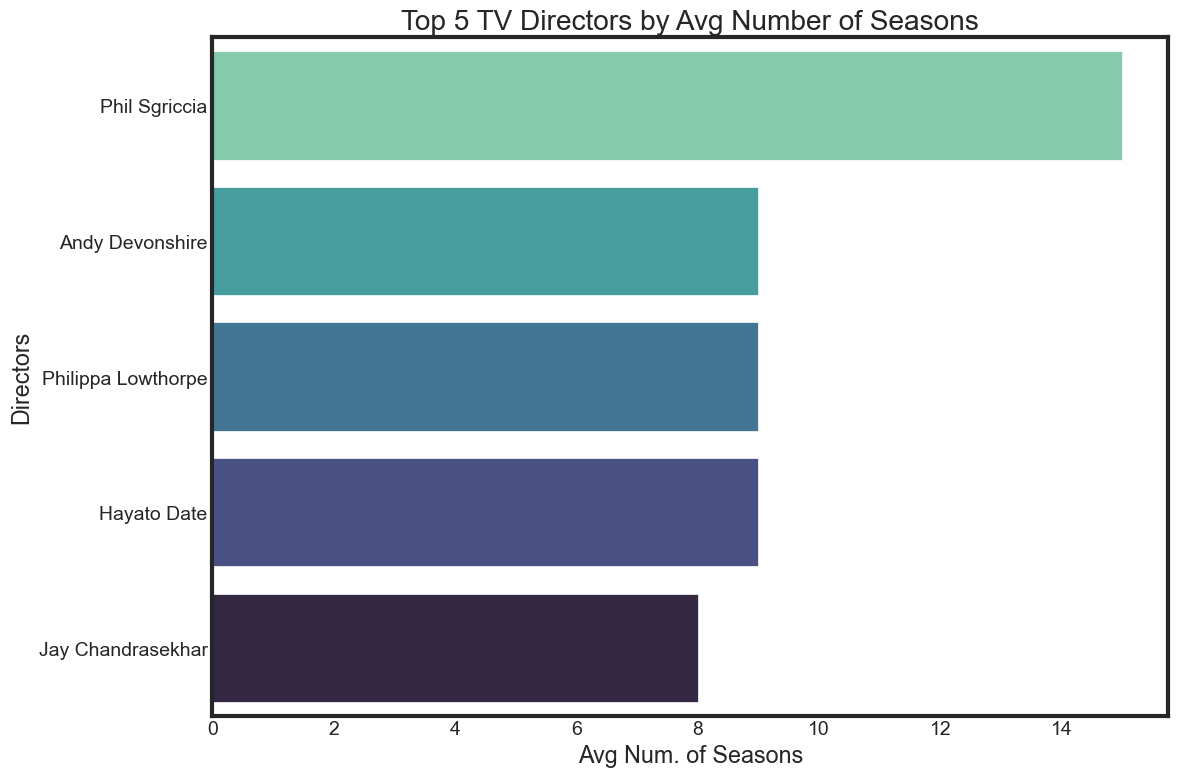

In [102]:
directors_order = top_tv_dir['director']

# Create vertical bar plot
f, ax = plt.subplots(figsize=(12, 8))  # Optional: adjust figure size
sns.barplot(y="director",x='duration_int',data=tv_show, palette="mako_r",order=directors_order,ax=ax)

# Add title and labels
plt.title('Top 5 TV Directors by Avg Number of Seasons')
plt.xlabel('Avg Num. of Seasons')
plt.ylabel('Directors')

# Show plot
plt.tight_layout()  # Optional: adjust layout
plt.show()